In [1]:
import numpy as np
import numpy.linalg as npl
import matplotlib.pyplot as plt

# 4.1,2 Clustering & A Clustering Objective

1. "The goal of clustering is to group of partition vectors into k groups or clusters, with the vectors in each group close to each other"
2. Objective: A single value used to judge "choice of clustering": choose k

In [2]:
#given a tuple of vectors, and representatives for groups of vectors,
#what is the average distance each vector has from a representative

x = np.array([[0,1],[1,0],[-1,1]])
reps = np.array([[1,1],[0,0]])

jclust = lambda x, reps, assignment: np.average([npl.norm(x[i] - reps[assignment[i]])**2 for i in range(len(x))])
jclust(x,reps,[0,1,0]),jclust(x,reps,[0,0,1]) #assignments are 0 indexed

#How can we select the center-most (most minimal distance between vectors)
#representative?

(2.0, 1.3333333333333333)

# 4.3 k-Means Algorithm

"Iterating between choosing group representatives and choosing group assignments"

#### Pseduo:
1. Initialize a group of representatives either by: 1) randomly selecting from set of vectors, or 2) randomly group vectors and create mean vectors to be used as representatives.
2. Partition vectors in k amount of groups. Assign a group for every vector associated with the nearest representative.
    If there are any ties for vector assignments, choose the group with the smallest j value of the ties.
    If there is an empty group, remove from list of k groups.
    If there are two iterations without changes in vector assignments, stop algorithm.
3. Update representatives. For every group from 1-k set the corresponding representative to be the mean of the vectors in that group.
    If Jclust gets small, stop algorithm.

In [3]:
def kmeans(x,k,maxiters = 100, tolerance = 1e-4):
    
    N = len(x) #amount of vectors
    n = len(x[0]) #dimension of each vector
    distances = np.zeros(N) #stores distances of each pt to nearest rep
    progress = [] #used to visualize J updates
    jPrev = np.Infinity #placeholder for ending condition: 
                        #if previous J and current J haven't changed much,finish
    
    reps = [np.zeros(n) for j in range(k)] #stores representatives
    assignment = [np.random.randint(k) for i in range(N)] #intializes a random assignment of N integers between 0 and k
    
    for itr in range(maxiters):
        for j in range(k):
            group = [i for i in range(N) if assignment[i] == j]
            reps[j] = sum(x[group]/len(group))
        for i in range(N):
            #(distance and index):
            (distances[i], assignment[i]) = np.amin([npl.norm(x[i] - reps[j]) for j in range(k)]),[npl.norm(x[i] - reps[j]) for j in range(k)].index(np.amin([npl.norm(x[i] - reps[j]) for j in range(k)]))
        J = (npl.norm(distances)**2) / N
        progress.append([J,itr])
        print("Iteration " + str(itr) + ": Jclust = " + str(J)+".")
        if (itr > 1) and (abs(J-jPrev) < (tolerance * J)):
            return assignment, reps, progress
        
        jPrev = J  
    return assignment, reps, progress

In [4]:
X = np.concatenate(
    [[.3*np.random.randn(2) for i in range(100)],
     [np.array([1,1]) + .3*np.random.randn(2) for i in range(100)],
     [np.array([1,-1]) + .3*np.random.randn(2) for i in range(100)]]
)

((-1.5, 2.5), (-2, 2))

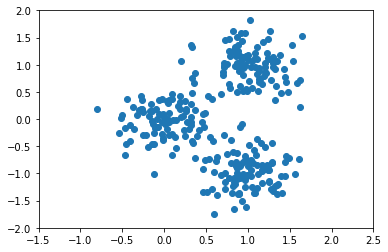

In [5]:
plt.scatter([x[0] for x in X],[x[1] for x in X])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

In [6]:
k=2
assignment, reps, progress = kmeans(X,k)

Iteration 0: Jclust = 0.9646719516399778.
Iteration 1: Jclust = 0.4811264691502557.
Iteration 2: Jclust = 0.4758870645691086.
Iteration 3: Jclust = 0.4758870645691086.


((-1.5, 2.5), (-2, 2))

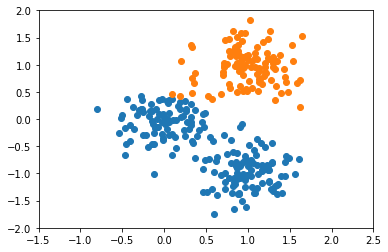

In [7]:
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

Iteration 0: Jclust = 0.8996932152276804.
Iteration 1: Jclust = 0.17418897065223787.
Iteration 2: Jclust = 0.17390992849767456.
Iteration 3: Jclust = 0.1738777123800779.
Iteration 4: Jclust = 0.1738777123800779.


((-1.5, 2.5), (-2, 2))

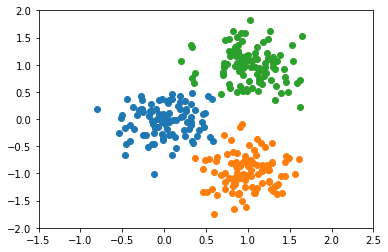

In [8]:
k=3
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])

Iteration 0: Jclust = 0.8258534827372022.
Iteration 1: Jclust = 0.3055400562346353.
Iteration 2: Jclust = 0.1561422391939681.
Iteration 3: Jclust = 0.15166971519143188.
Iteration 4: Jclust = 0.15124096213588498.
Iteration 5: Jclust = 0.15109574358426814.
Iteration 6: Jclust = 0.15109574358426814.


((-1.5, 2.5), (-2, 2))

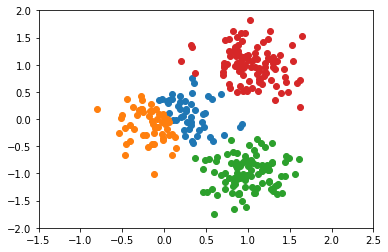

In [9]:
k=4
assignment, reps, progress = kmeans(X,k)
groups = [[X[i] for i in range(len(X)) if assignment[i] == j] for j in range(k)]
plt.scatter([c[0] for c in groups[0]],[c[1] for c in groups[0]])
plt.scatter([c[0] for c in groups[1]],[c[1] for c in groups[1]])
plt.scatter([c[0] for c in groups[2]],[c[1] for c in groups[2]])
plt.scatter([c[0] for c in groups[3]],[c[1] for c in groups[3]])
plt.xlim([-1.5,2.5]),plt.ylim([-2,2])
# plt.show()
# plt.scatter([i[1] for i in progress],[i[0] for i in progress])
# plt.show()

# 4.4 Examples

In [ ]:
# clustering the mnist image dataset

import random
from base64 import b64decode
from json import loads
import numpy as np
import matplotlib.pyplot as plt
# set matplotlib to display all plots inline with the notebook
%matplotlib inline

def parse(x):
    """
    to parse the digits file into tuples of 
    (labelled digit, numpy array of vector representation of digit)
    """
    digit = loads(x)
    array = np.fromstring(b64decode(digit["data"]),dtype=np.ubyte)
    array = array.astype(np.float64)
    return (digit["label"], array)


# read in the digits file. Digits is a list of 60,000 tuples,
# each containing a labelled digit and its vector representation.
with open("digits.base64.json","r") as f:
    digits = map(parse, f.readlines())
    
# pick a ratio for splitting the digits list into a training and a validation set.
digits = list(digits)
ratio = int(len(digits)*0.25)
validation = digits[:ratio]
training = digits[ratio:]

def display_digit(digit, labeled = True, title = ""):
    """ 
    graphically displays a 784x1 vector, representing a digit
    """
    if labeled:
        digit = digit[1]
    image = digit
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    if title != "":
        plt.title("Inferred label: " + str(title))
        

# writing Lloyd's Algorithm for K-Means clustering.
# (This exists in various libraries, but it's good practice to write by hand.)
def init_centroids(labelled_data,k):
    """
    randomly pick some k centers from the data as starting values for centroids.
    Remove labels.
    """
    return map(lambda x: x[1], random.sample(labelled_data,k))

def sum_cluster(labelled_cluster):
    """
    from http://stackoverflow.com/questions/20640396/quickly-summing-numpy-arrays-element-wise
    element-wise sums a list of arrays. assumes all datapoints in labelled_cluster are labelled.
    """
    # assumes len(cluster) > 0
    sum_ = labelled_cluster[0][1].copy()
    for (label,vector) in labelled_cluster[1:]:
        sum_ += vector
    return sum_

def mean_cluster(labelled_cluster):
    """
    computes the mean (i.e. the centroid at the middle) of a list of vectors (a cluster).
    take the sum and then divide by the size of the cluster.
    assumes all datapoints in labelled_cluster are labelled.
    """
    sum_of_points = sum_cluster(labelled_cluster)
    mean_of_points = sum_of_points * (1.0 / len(labelled_cluster))
    return mean_of_points

def form_clusters(labelled_data, unlabelled_centroids):
    """
    given some data and centroids for the data, allocate each datapoint
    to its closest centroid. This forms clusters.
    """
    # enumerate because centroids are arrays which are unhashable,
    centroids_indices = range(len(unlabelled_centroids))
    
    # initialize an empty list for each centroid. The list will contain
    # all the datapoints that are closer to that centroid than to any other.
    # That list is the cluster of that centroid.
    clusters = {c: [] for c in centroids_indices}
    
    for (label,Xi) in labelled_data:
        # for each datapoint, pick the closest centroid.
        smallest_distance = float("inf")
        for cj_index in centroids_indices:
            cj = unlabelled_centroids[cj_index]
            distance = np.linalg.norm(Xi - cj)
            if distance < smallest_distance:
                closest_centroid_index = cj_index
                smallest_distance = distance
        # allocate that datapoint to the cluster of that centroid.
        clusters[closest_centroid_index].append((label,Xi))
    return clusters.values()

def move_centroids(labelled_clusters):
    """
    returns a list of centroids corresponding to the clusters.
    """
    new_centroids = []
    for cluster in labelled_clusters:
        new_centroids.append(mean_cluster(cluster))
    return new_centroids

def repeat_until_convergence(labelled_data, labelled_clusters, unlabelled_centroids):
    """
    form clusters around centroids, then keep moving the centroids
    until the moves are no longer significant, i.e. we've found
    the best-fitting centroids for the data.
    """
    previous_max_difference = 0
    while True:
        unlabelled_old_centroids = unlabelled_centroids
        unlabelled_centroids = move_centroids(labelled_clusters)
        labelled_clusters = form_clusters(labelled_data, unlabelled_centroids)
        # we keep old_clusters and clusters so we can get the maximum difference
        # between centroid positions every time. we say the centroids have converged
        # when the maximum difference between centroid positions is small.   
        differences = map(lambda a, b: np.linalg.norm(a-b),unlabelled_old_centroids,unlabelled_centroids)
        max_difference = max(differences)
        difference_change = abs((max_difference-previous_max_difference)/np.mean([previous_max_difference,max_difference])) * 100
        previous_max_difference = max_difference
        # difference change is nan once the list of differences is all zeroes.
        if np.isnan(difference_change):
            break
    return labelled_clusters, unlabelled_centroids


def cluster(labelled_data, k):
    """
    runs k-means clustering on the data. It is assumed that the data is labelled.
    """
    centroids = init_centroids(labelled_data, k)
    labelled_data = list(labelled_data)
    centroids = list(centroids)
    clusters = form_clusters(labelled_data, centroids)
    final_clusters, final_centroids = repeat_until_convergence(labelled_data, clusters, centroids)
    return final_clusters, final_centroids


def assign_labels_to_centroids(clusters, centroids):
    """
    Assigns a digit label to each cluster.
    Cluster is a list of clusters containing labelled datapoints.
    NOTE: this function depends on clusters and centroids being in the same order.
    """
    labelled_centroids = []
    for i in range(len(clusters)):
        labels = map(lambda x: x[0], clusters[i])
        labels = list(labels)
        # pick the most common label
        most_common = max(set(labels), key=labels.count)
        centroid = (most_common, centroids[i])
        labelled_centroids.append(centroid)
    return labelled_centroids

def classify_digit(digit, labelled_centroids):
    """
    given an unlabelled digit represented by a vector and a list of
    labelled centroids [(label,vector)], determine the closest centroid
    and thus classify the digit.
    """
    mindistance = float("inf")
    for (label, centroid) in labelled_centroids:
        distance = np.linalg.norm(centroid - digit)
        if distance < mindistance:
            mindistance = distance
            closest_centroid_label = label
    return closest_centroid_label

def get_error_rate(digits,labelled_centroids):
    """
    classifies a list of labelled digits. returns the error rate.
    """
    classified_incorrect = 0
    for (label,digit) in digits:
        classified_label = classify_digit(digit, labelled_centroids)
        if classified_label != label:
            classified_incorrect +=1
    error_rate = classified_incorrect / float(len(digits))
    return error_rate

error_rates = {x:None for x in list(range(5,25))+[100]}
for k in range(5,25):
    trained_clusters, trained_centroids = cluster(training, k)
    trained_clusters, trained_centroids = list(trained_clusters), list(trained_centroids)
    labelled_centroids = assign_labels_to_centroids(trained_clusters, trained_centroids)
    error_rate = get_error_rate(validation, labelled_centroids)
    error_rates[k] = error_rate

# Show the error rates
x_axis = sorted(error_rates.keys())
y_axis = [error_rates[key] for key in x_axis]
plt.figure()
plt.title("Error Rate by Number of Clusters")
plt.scatter(x_axis, y_axis)
plt.xlabel("Number of Clusters")
plt.ylabel("Error Rate")
plt.show()


In [ ]:

k = 16
trained_clusters, trained_centroids = cluster(training, k)
labelled_centroids = assign_labels_to_centroids(trained_clusters, trained_centroids)


In [ ]:
for x in labelled_centroids:
    display_digit(x, title=x[0])

# 4.5 Applications